## 3차 과제 - 당뇨병을 예측해보자
- 주제: 데이터 분석 실습(머신러닝)
- 데이터: 피마 인디언 당뇨병 데이터
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- 사용 라이브러리: numpy, pandas, matplotlib, sklearn


### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, sklearn(train_test_split, accurarcy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, StandardScaler, LogisticRegression)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

1.2 데이터를 불러오고 타겟 변수('Outcome')에 속한 값들의 비율과(value_counts 활용) 전체 데이터 앞 7개 값을 확인하세요.

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data['Outcome'].value_counts() / len(data['Outcome'])

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [5]:
data.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


1.3 데이터의 feature 타입과 Null 개수를 확인하세요.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


1.4 예측을 위해 데이터를 feature 데이터 셋과 target 데이터 셋으로 나누세요.

In [7]:
X = data.drop('Outcome', axis=1) # feature
y = data['Outcome'] # target

1.5 X와 y로 나눈 데이터 셋을 다시 train, test로 나누세요(test_size = 0.3, random_state=123, stratify=y).

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

1.6 test size는 어느정도로 해야 좋은지 그리고 왜 그래야 하는지 작성하세요.

데이터의 양이 많은 경우 train data 의 비율을 높게 가져가도 검증할 데이터인 test data의 양이 충분하기때문에 0.95:0.05 비율로 가져가도 무방함 
그러나 데이터의 양이 많지 않을 경우 train data 의 비율을 높게 가져가기에는 무리가 있음  
이같은 경우에는 보통 0.7:0.3 비율로 train data의 비중을 낮추기도 함

해당 데이터의 경우에는 768개의 데이터로 양이 많지 않은경우에 해당하여 7:3 비율로 test size를 지정하는게 적절함

1.7 startify 값을 설정하는 이유와 언제 주로 사용되는지 서술하세요.

startify 값의 경우 설정한 값(클래스)에 대해서 분포의 비율을 맞춰 줄때 사용하고  
현재 다루고 있는 데이터셋의 경우 타겟변수의 비율이 0.65:0.35 정도로 불균형한 상태임으로  
startify 값을 설정하여 모델이 한 클래스에 치우치지 않고 모든 클래스를 균형있게 학습할수 있도록 도움  


### 2. 예측 및 분석

2.1 성능 평가에 사용될 함수를 만들어보겠습니다. accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score로 구성되어 있으며 이를 한번에 출력할 수 있도록 합니다.

In [9]:
def clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬,\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


2. 위에서 사용한 성능지표인 Confusion Matrix에 대해 설명하세요.

 Confusion matrix는 분류 모델이 두 개 이상의 클래스를 구분하는 경우,  
 모델이 얼마나 잘못된 클래스를 예측하였나 하는 '혼동' 이나 '오차'를 행렬로 나타낸 것  
  
 [참고] https://wikidocs.net/194087

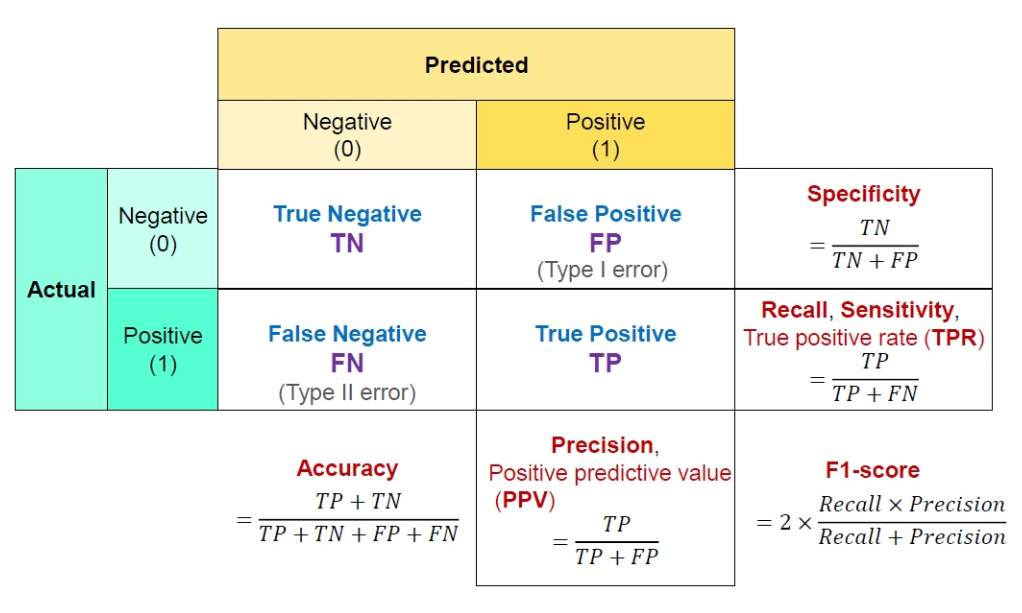

2.2 로지스틱 회귀로 예측 후 위에서 만든 clf_eval() 함수를 통해 잘 예측했는지 확인하세요(solver='linear'로 설정, 예측 변수명은 pred, pred_proba).

In [10]:
from sklearn.linear_model import LogisticRegression

# 생성
logistic_model = LogisticRegression(solver='liblinear')

# 학습
logistic_model.fit(X_train, y_train)

# 예측
pred = logistic_model.predict(X_test)
pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# 평가
clf_eval(y_test, pred, pred_proba)


오차 행렬,
 [[134  16]
 [ 39  42]]
정확도: 0.7619, 정밀도: 0.7241, 재현율: 0.5185, F1: 0.6043, AUC:0.8434


2.3 LogisticRegression에서 solver 파라미터의 역할과 어떤 것들이 있고 각각은 무엇을 의미하는지 작성하세요.

- solver 역할?  
    - 로지스틱 회귀 모델의 비용 함수를 최소화하기 위해 사용되는 최적화 알고리즘을 지정  

- solver 종류?
    - liblinear :  
    한 번에 하나의 파라미터만 업데이트하는 경사 하강법의 변형 사용
    - newton-cg :  
    뉴턴 방법의 변형인 뉴턴-렙슨 방법을 사용  
    여러 번의 업데이트를 통해 비용 함수를 최소화하며 2차 도함수를 계산하는 과정 필요
    - lbfgs :  
    제한된 메모리를 사용하는 BFGS 알고리즘의 변형  
    전체 2차 도함수 대신 근사치를 사용하요 메모리 사용량을 줄임 
    - sag :  
    확률적 평균 경사 하강법(Stochastic Average Gradient descent)  
    각 단계에서 모든 샘플을 사용하지 않고 일부 샘플만 사용하여 경사를 업데이트
    - saga :  
    sag의 개선 버전  
    sag와 유사하게 작동하지만 L1 정규화를 효과적으로 처리할 수 있는 기능 추가됨  
    

2.4 pred와 pred_proba는 각각 어떤 차이가 있는지 작성하세요.

 - pred : 클래스 레이블(예를 들어, 0 또는 1)을 직접 반환  
 - pred_proba : 각 클래스에 속할 예측 확률을 반환

2.5 전체 데이터 중 약 65%가 Negative이므로 재현율 성능에 조첨을 맞추겠습니다. 정밀도 재현율 curve를 보고 임계값 별 정밀도 재현율 값의 변화를 확인하기 위해 이를 위한 함수를 작성하겠습니다.

In [11]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X축, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

    plt.show()


2.6 작성한 함수를 바탕으로 임계값 별 정밀도와 재현율 값 변화를 확인하세요.

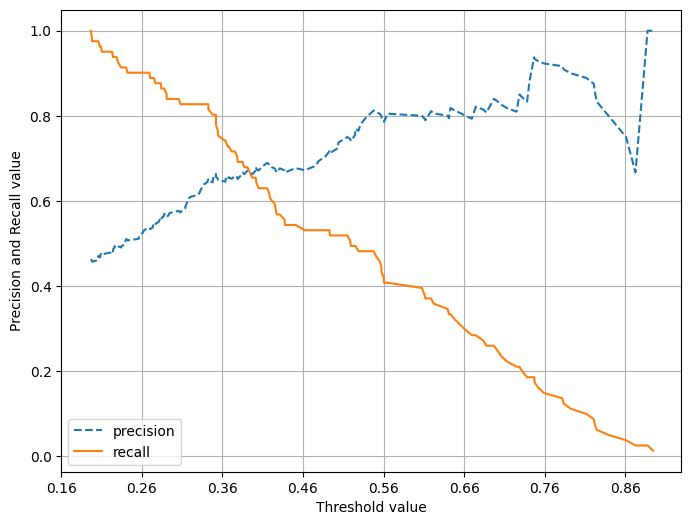

In [12]:
pred_proba_c1 = logistic_model.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

2.7 그래프를 통해 확인했을 때 Threshold를 0.38정도로 설정했을 때 recall과 precision이 어느정도 균형이 맞음을 알 수 있습니다. 그러나 두 지표 모두 0.7 이하로 낮은 값이기에 다시 확인하도록 하겠습니다. 먼저 describe() 함수를 통해 개별 feature에 대한 분포도를 확인하세요.

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.8 위에서 확인해봤을 때 min 값이 0으로 되어 있는 feature가 다수 존재합니다. Glucose(포도당 수치), BMI 지수가 0인 것은 말이 안 되므로 이들을 평균값으로 대체하세요.

In [14]:
# 0 값 -> NaN으로 대체
data['Glucose'].replace(0, np.nan, inplace=True)
data['BloodPressure'].replace(0, np.nan, inplace=True)
data['SkinThickness'].replace(0, np.nan, inplace=True)
data['Insulin'].replace(0, np.nan, inplace=True)
data['BMI'].replace(0, np.nan, inplace=True)

# NaN 값 -> 각 컬럼의 평균값으로 대체
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].mean(), inplace=True)
data['Insulin'].fillna(data['Insulin'].mean(), inplace=True)
data['BMI'].fillna(data['BMI'].mean(), inplace=True)

In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.9 이후 대체한 feature들에 대해 feature scaling을 진행하겠습니다. 모두 numeric feature이므로 X에 대해 StandardScaler를 일괄 적용하세요.

In [16]:
# StandardScaler 생성
scaler = StandardScaler()

# StandardScaler 적용
X_scaled = scaler.fit_transform(X)

2.10 feature scaling은 왜 사용하고 어떤 것들이 있는지 작성하세요.

- feature scaling 이란?
    - 서로 다른 feature 값의 범위가 일치하도록 조정하는 작업
    - 값의 범위가 데이터마다 다르면 모델 학습이 제대로 안 될 수도 있어 사용

- feature scaling 종류?
    - 표준화(Standardization) :  
    데이터의 평균 -> 0 , 표준편차 -> 1 로 조정  
    - 정규화(Normalization) :  
    데이터의 값을 0과 1 사이의 범위로 조정
    - Normalization :  
    데이터의 절대값이 0과 1 사이가 되도록 조정  
    - RobustScaler :  
    중앙값을 0으로 IQR을 1로 조정  
    

2.11 다시 에측하기에 앞서 위에서 scaling을 통해 변경된 X_scaled를 활용해 다시 train_test_split을 진행하세요(함수 파라미터 동일).

In [17]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123, stratify=y)

2.12 로지스틱 회귀로 앞서 진행한 것과 동일하게 진행하세요.

In [18]:
from sklearn.linear_model import LogisticRegression

# 생성
logistic_model = LogisticRegression(solver='liblinear')

# 학습
logistic_model.fit(X_train_scaled, y_train)

# 예측
pred = logistic_model.predict(X_test_scaled)
pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

# 평가
clf_eval(y_test, pred, pred_proba)


오차 행렬,
 [[132  18]
 [ 38  43]]
정확도: 0.7576, 정밀도: 0.7049, 재현율: 0.5309, F1: 0.6056, AUC:0.8584


### 3. 자유 분석
성능을 높일 수 있는 방법들을 활용해 예측을 진행하세요.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


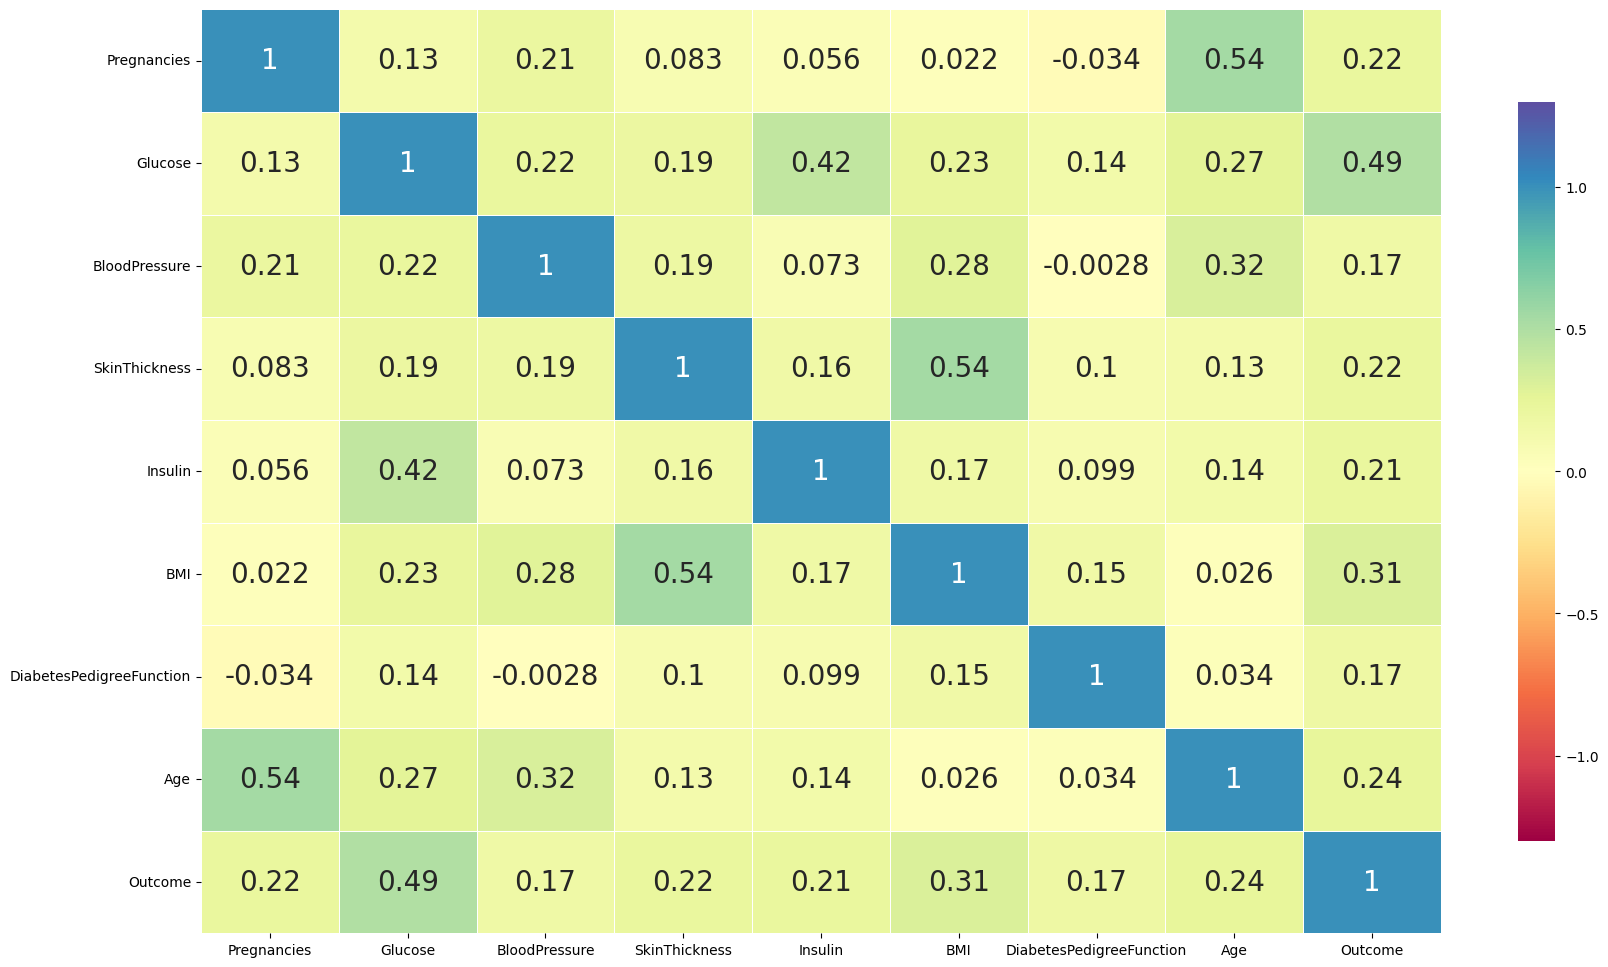

In [20]:
import seaborn as sns

# 숫자형 변수들 간의 상관관계 계산
corr = data.corr()

# 상관계수 행렬의 상삼각행렬을 마스킹하기 위한 마스크 생성
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵
plt.figure(figsize=(20, 12))

sns.heatmap(corr,
            annot=True, # 수치(상관관계) 표시
            annot_kws = {'size':20}, # 수치표시 사이즈
            cmap='Spectral', # 색상 변경
            vmin=-1.3, # 색상 팔레트 범위
            vmax=1.3,
            linewidths=.5, # 히트맵의 선 스타일 변경
            cbar_kws={"shrink": .8}) # 히트맵 주변에 색상 바 추가(사이즈 조절 가능)

# 변수 이름의 크기 조절
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

강한 상관관계를 보이는 변수 x

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

   VIF Factor                  features
0    3.275748               Pregnancies
1   16.725078                   Glucose
2   14.619512             BloodPressure
3    4.008696             SkinThickness
4    2.063689                   Insulin
5   18.408884                       BMI
6    3.195626  DiabetesPedigreeFunction
7   13.492985                       Age


몇개의 변수에 대해서 다중공산성(vif) > 10 으로 나타남  
- BMI, Glucose, BloodPressure, Age

위의 변수중 BMI, Age 변수에 대해서 피쳐엔지니어링을 진행해보겠음

피쳐 엔지니어링

In [22]:
# BMI 기준표 정의
conditions = [
    (data['BMI'] < 18.5),
    (data['BMI'] >= 18.5) & (data['BMI'] < 25),
    (data['BMI'] >= 25) & (data['BMI'] < 30),
    (data['BMI'] >= 30) & (data['BMI'] < 35),
    (data['BMI'] >= 35) & (data['BMI'] < 40),
    (data['BMI'] >= 40)
]

# 해당 기준표에 대한 라벨
labels = ['Underweight', 'normal', 'overweight', 'stage_I_obesity', 'stage_II_obesity', 'stage_III_obesity']

# 새로운 열 'BMI_Cat'
data['BMI_Cat'] = np.select(conditions, labels)

In [23]:
# 각 BMI 범주별로 'Outcome'의 평균(비율) 계산
outcome_rates_bmi = data.groupby('BMI_Cat')['Outcome'].mean()

# 결과 출력
print(outcome_rates_bmi)

BMI_Cat
Underweight          0.000000
normal               0.068627
overweight           0.223464
stage_III_obesity    0.561224
stage_II_obesity     0.420000
stage_I_obesity      0.438298
Name: Outcome, dtype: float64


Outcome'의 비율이 높은 값(obesity) 에 대하여 더미 변수 생성

In [25]:
# 더미 변수 생성 함수 정의
def create_dummy_bmi(x):
    if x in ['stage_II_obesity', 'stage_III_obesity', 'stage_I_obesity']:
        return 1
    else:
        return 0

# 'BMI_Cat' 열에 함수 적용
data['Obesity_Dummy'] = data['BMI_Cat'].apply(create_dummy_bmi)

In [26]:
data['Obesity_Dummy'].value_counts()

1    483
0    285
Name: Obesity_Dummy, dtype: int64

In [28]:
# age 기준표 정의
conditions = [
    (data['Age'] < 30),
    (data['Age'] >= 30) & (data['Age'] < 40),
    (data['Age'] >= 40) & (data['Age'] < 50),
    (data['Age'] >= 50) & (data['Age'] < 60),
    (data['Age'] >= 60) & (data['Age'] < 70),
    (data['Age'] >= 70)
]

# 해당 기준표에 대한 라벨
labels = ['Age_20', 'Age_30', 'Age_40', 'Age_50', 'Age_60', 'Age_70']

# 새로운 열 'Age_Cat'
data['Age_Cat'] = np.select(conditions, labels)

In [29]:
# 각 Age 범주별로 'Outcome'의 평균(비율) 계산
outcome_rates_age = data.groupby('Age_Cat')['Outcome'].mean()

# 결과 출력
print(outcome_rates_age)

Age_Cat
Age_20    0.212121
Age_30    0.460606
Age_40    0.550847
Age_50    0.596491
Age_60    0.275862
Age_70    0.333333
Name: Outcome, dtype: float64


In [30]:
# 더미 변수 생성 함수 정의
def create_dummy_age(x):
    if x in ['Age_30', 'Age_40', 'Age_50']:
        return 1
    else:
        return 0

# 'BMI_Cat' 열에 함수 적용
data['Mid_Age_Dummy'] = data['Age_Cat'].apply(create_dummy_age)

In [32]:
data['Mid_Age_Dummy'].value_counts()

0    428
1    340
Name: Mid_Age_Dummy, dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   BMI_Cat                   768 non-null    object 
 10  Obesity_Dummy             768 non-null    int64  
 11  Age_Cat                   768 non-null    object 
 12  Mid_Age_Dummy             768 non-null    int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 78.1+ KB


In [34]:
data = data.drop(['BMI_Cat', 'Age_Cat'], axis=1)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Obesity_Dummy             768 non-null    int64  
 10  Mid_Age_Dummy             768 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 66.1 KB


In [36]:
X = data.drop('Outcome', axis=1) # feature
y = data['Outcome'] # target

In [37]:
# StandardScaler 생성
scaler = StandardScaler()

# StandardScaler 적용
X_scaled = scaler.fit_transform(X)

In [38]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123, stratify=y)

In [39]:
from sklearn.linear_model import LogisticRegression

# 생성
logistic_model = LogisticRegression(solver='liblinear')

# 학습
logistic_model.fit(X_train_scaled, y_train)

# 예측
pred = logistic_model.predict(X_test_scaled)
pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

# 평가
clf_eval(y_test, pred, pred_proba)


오차 행렬,
 [[131  19]
 [ 36  45]]
정확도: 0.7619, 정밀도: 0.7031, 재현율: 0.5556, F1: 0.6207, AUC:0.8616


타겟변수의 비율을 활용하여 상대적으로 높은 수치들을 범주화하는 방식을 이용  

평가지표를 확인하였을때 크게 차이나는 부분은 없음을 확인할수 있음